In [4]:
%pip install scikit-learn matplotlib seaborn pandas numpy
from sklearn.datasets import fetch_california_housing, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import sqrt








Note: you may need to restart the kernel to use updated packages.


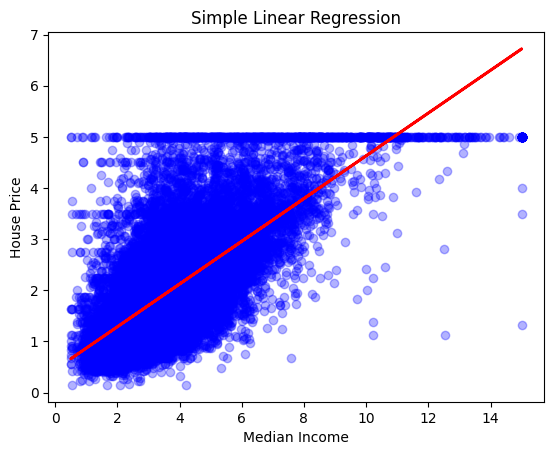

In [5]:
#Task 1
data = fetch_california_housing()
X = data.data[:, [0]] 
y = data.target

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, color='blue', alpha=0.3)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.title("Simple Linear Regression")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

In [6]:
#Task 2

X_multi = data.data 
y_multi = data.target

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

y_pred = multi_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

print("Feature Coefficients:")
for feature, coef in zip(data.feature_names, multi_model.coef_):
    print(f"{feature}: {coef}")

R-squared: 0.575787706032452
Mean Squared Error: 0.5558915986952427
Root Mean Squared Error: 0.7455813830127753
Feature Coefficients:
MedInc: 0.4486749096657175
HouseAge: 0.009724257517905108
AveRooms: -0.12332334282795858
AveBedrms: 0.7831449067929739
Population: -2.0296205801141797e-06
AveOccup: -0.003526318487134053
Latitude: -0.41979248658835916
Longitude: -0.43370806496398767


In [7]:


# Task 3

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_multi, test_size=0.2, random_state=42)

scaled_model = LinearRegression()
scaled_model.fit(X_train_scaled, y_train)

y_scaled_pred = scaled_model.predict(X_test_scaled)

r2_scaled = r2_score(y_test, y_scaled_pred)
mse_scaled = mean_squared_error(y_test, y_scaled_pred)
rmse_scaled = sqrt(mse_scaled)

print("After Scaling - R-squared:", r2_scaled)
print("After Scaling - MSE:", mse_scaled)
print("After Scaling - RMSE:", rmse_scaled)

After Scaling - R-squared: 0.575787706032451
After Scaling - MSE: 0.5558915986952442
After Scaling - RMSE: 0.7455813830127763


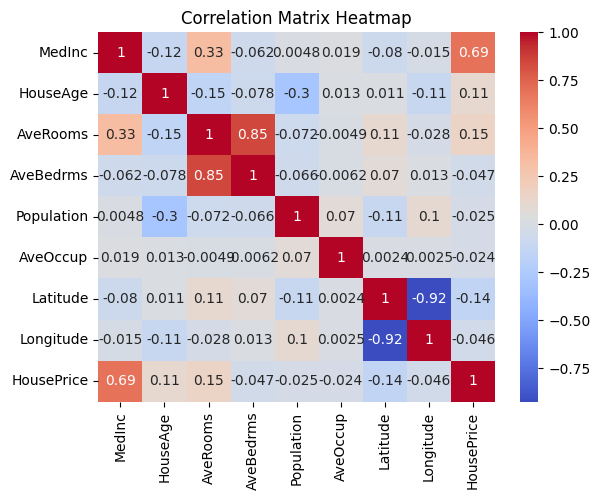

Features with strongest correlation to HousePrice:
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HousePrice, dtype: float64


In [8]:
# Task 4

df = pd.DataFrame(data.data, columns=data.feature_names)
df['HousePrice'] = data.target

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

strong_corr = corr_matrix['HousePrice'].drop('HousePrice').sort_values(ascending=False)
print("Features with strongest correlation to HousePrice:")
print(strong_corr)

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC Score: 0.9977071732721913


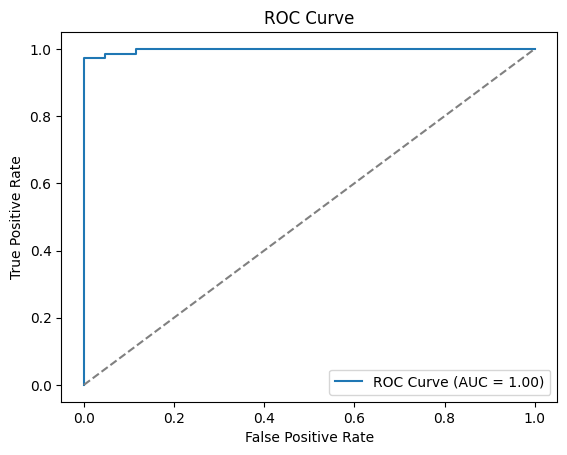

In [9]:
# Task 5
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Threshold: 0.3
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.5
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1 Score: 0.9655172413793104

Threshold: 0.7
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1 Score: 0.9790209790209791


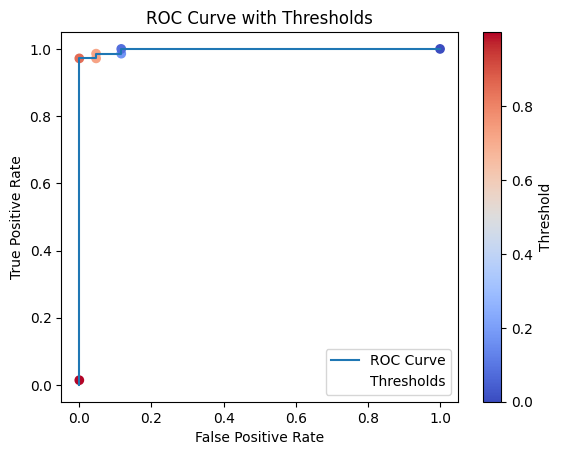

In [10]:
# Task 6
thresholds_to_test = [0.3, 0.5, 0.7]
for thresh in thresholds_to_test:
    y_thresh_pred = (y_prob >= thresh).astype(int)
    conf_matrix_thresh = confusion_matrix(y_test, y_thresh_pred)
    f1 = f1_score(y_test, y_thresh_pred)
    print(f"\nThreshold: {thresh}")
    print("Confusion Matrix:\n", conf_matrix_thresh)
    print("F1 Score:", f1)

plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr, tpr, c=thresholds, cmap='coolwarm', label='Thresholds')
plt.colorbar(label='Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.show()

In [11]:
# Task 7
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

multi_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
multi_model.fit(X_train_iris, y_train_iris)

y_pred_iris = multi_model.predict(X_test_iris)
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
report_iris = classification_report(y_test_iris, y_pred_iris)

print("Multiclass Logistic Regression Accuracy:", accuracy_iris)
print("Classification Report:\n", report_iris)

Multiclass Logistic Regression Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
